<center><img src="../images/logo.png" width="500" /></center>

# Ontologies

## 1 Basic Idea

With the advancement of Information Technology in all sectors, the term “ontology“ is finding a resurgence in today’s data infrastructure landscape. 
It is not a new concept, but perhaps it is quite underutilised. It has deep philosophical roots and many definitions which can be obtuse like from Wikipedia [1]: "a formal naming and definition of the types, properties, and interrelationships of the entities that really or fundamentally exist for a particular domain of discourse. It is thus a practical application of philosophical ontology, with a taxonomy..."

However, in the context of data structures it is essentially a way to define, structure, and organise your data by specifying key concepts and the relationships between them. In practice, it provides a “blueprint” for your specific knowledge domain (e.g. Financial Regulations) that in principle can be easily accessed by various systems (Supervisory entities, Disclosure reports, ...) and maintains contextual definitions allowing these various systems to share a consistent understanding of terminology.

## 1.1 Why Today

There are of course many ways to organize your data so why should you choose ontologies? We list here a simple comparison in the following table: 

| Type | Taxonomies | Databases | Ontologies |
| --- | --- | --- | --- | 
| Description | Hierarchical classifications that organize information into parent-child relationships |Structured collections of data organized into tables with rows and columns| Define key concepts, their properties, and the relationships between them. “detailed dictionaries”: focus on interconnectedness | 
| Pros | Simple to create and understand; good for basic categorization |They provide efficient querying and data manipulation capabilities. | Can adapt to evolving knowledge and enable sharing information across different systems through **semantic understanding** |
| Cons| Limited to hierarchical relationships; cannot capture complex interrelationships between concepts.| Lack the ability to represent complex relationships and reasoning capabilities  | Complex to build and maintain, limited tools available |

where we want to highlight that one of the very key points that sets ontologies apart is its ability to evolve and provide semantic understanding inherent to your data framework, that is to say, the ability to go beyond the literal meaning of the data and grasp its deeper meaning and relationships which is the true strength of ontologies.

For example:

**Semantic Understanding of User Intent with Ontologies in the context of Machine Learning**

**Challenge**: Large language models (LLM) struggle to understand complex user intent. Example: "Paris" requires knowledge of it being a city and your potential desire to visit.

**Solution**: Ontologies provide machines with background knowledge. Define "Paris" as a city with properties (location, attractions). Understand user location and potential travel intent.

**Benefit**: Machine learning can focuses on core desired tasks such as proposing relevant train lines and tourist venues, instead of deciphering first the meaning of 'Paris'.


This ways of organizing data is already used today in various fields such as in: Healthcare (SNOMED CT), Finance (Financial Industry Business Ontology), Biology (Gene Ontology), E-commerce (GoodRelations).


## 2 Ontologies Defined

This is however still very abstract. The easiest way to understanding ontologies is by learning through an example [2].
We summarize the example here as a way to describe books. 
Every book needs to have an author, an entity that wrote the book. The author has a name. A book has a title. The author lives in a location.
The book has a publisher. The author works with a publisher. The publisher is also based in a given location. This is all information that can be organized comprehensively. An ontology does this by requiring the following:

1. **Classes**: These represent the core concepts within your domain.
2. **Instances**: These are specific examples that belong to a class.
3. **Properties (Attributes)**: These define the characteristics of a class or instance.
4. **Relationships**: These define the connections between classes and instances.
5. **Axioms (Constraints)**: These are rules that govern the relationships and properties within the ontology.

In the given example, books, authors, and publishers make great _classes_ while the name of the book or the author would be some of the possible _properties_ related to these classes. That a book has an author is an example of the _relationship_ between the 'book' and 'author'.

<center><img src="images/book_onto.png" alt="drawing" width="600"/>

An _instance_ of an ontology is just populating our ontology with specific information, for example the renowned author Harper Lee has written the books 'To Kill a Mockingbird' and 'Go Set a Watchmann' while living in the united states, working with the publishing company J.B. Lippincott & Company.

<center><img src="images/book_onto_instance.png" alt="drawing" width="600"/>




### 2.1 Benefits
Without going into detail we state the benefits of using ontologies:

1. **Standardization**: Ontologies provide a common vocabulary, reducing ambiguity and enhancing clarity across different systems. (e.g., Paris will always mean a city and not a person, in the context of tourism)

2. **Data Integration**: They facilitate the integration of similar data sources by establishing consistent relationships and meanings.

3. **Interoperability**: Ontologies enable different systems and applications to understand and use shared data effectively.

4. **Enhanced Search and Retrieval**: By providing semantically structured knowledge, ontologies improve the accuracy and relevance of search results.

5. **Automated Reasoning**: Ontologies support reasoning and inference, allowing for advanced data analysis and decision-making, i.e. new connections automatically determined.

6. **Regulatory Compliance**: In financial and other regulated industries, ontologies help automate compliance checks and ensure adherence to standards especially when new regulations/documents are developed.

## 3 Creating Ontology Example Model in the Framework of European Insurance Regulations

In the interest of managing and keeping up to date with the developing landscape of ESG regulations in the financial sector, it has been proposed that one can use ontologies as a way to structure the vast and multifaceted data challenges faced therein. The idea being, that by defining key concepts and their interrelationships, one can easily access semantic data as well as infer new results. Yu et. al 2024 [3] has formulated an example ontology to describe regulatory documents concerning ESG disclosure regulations as seen in the figure.

<center><img src="images/esg_onto_yu2024.png" alt="drawing" width="700"/>


Of course, this is not limited to ESG disclosure. Naturally, supervisory frameworks exist in many fields and of course for insurance firms, there is the SCR [4] detailing the required capital. This document is extensive and references many other existing documents. Having a data framework that can describe these documents and regulations and their relationships can facilitate a better and faster understanding thereof, e.g., how do I calculate Market Risk and which components are related to it?

In this specific context, one can create an ontology where we define some key concepts, there are financial institutions (FI) and supervisory authorities.
These financial institutions have portfolios which detail their positions and financial instruments. The supervisory authority has a reporting framework that the FI must adhere to and report quarterly some metrics. These metrics are calculated based on the assets of the FI.
This shows the potential for complex interrelationships between key concepts.

We use here the Owlready2 python package to try and replicate such an Ontology, and then create an **"Instance"** of some of the **"Classes"** to represent real world reporting frameworks.
We loosely follow the owlready2 tutorial [5]. 




In [1]:
#packages to install if it is not working from the environment.yml
# ! pip install owlready2
# ! pip install rdflib
# ! conda install graphvis  # has to be done first before pydot
# ! pip install pydotplus
# ! pip install networkx
# ! pip install pyvis

#Please change the filepath as necessary

### 3.1 We define our ontology

One of the first steps in developing an ontology is defining the key concepts (top-down).
We define the specific parts of our framework and then use a reasoner.
A reasoner is a software tool (here we use HermiT) that performs logical inference over ontologies. It uses the formal semantics defined by the ontology's language (typically OWL - Web Ontology Language) to derive implicit knowledge from explicitly stated facts and axioms.


In [2]:
# choose if you execute this notebook via binder
binder=True

In [3]:
from owlready2 import *
import os
onto = get_ontology("http://test.org/onto.owl")
onto_root = "SCR"

import owlready2
#owlready2.JAVA_EXE = "C:\\path\\to\\java.exe"
# the 2 included reasoners in owlready2 are written in java and thus you need a java virtual machine to perform reasoning
if binder:
    !wget -O jdk.tar.gz https://download.oracle.com/java/24/latest/jdk-24_linux-x64_bin.tar.gz
    !mkdir -p jdk
    !tar -xzf jdk.tar.gz -C jdk --strip-components=1
    !rm jdk.tar.gz
    owlready2.JAVA_EXE = os.path.abspath("jdk/bin/java")
else:
    owlready2.JAVA_EXE = r"C:\Program Files\Java\jdk-11.0.16.1\bin\java.exe" # in order to use the reasoner, one must have Java installed

In [4]:
with onto:
    #our entities are classes
    class ReportingFramework(Thing): pass #A reporting framework that emerges from EU regulatioonss, including standards and guidelines such as IFRS S1, SCR, etc.
    class Category(Thing): pass   # Categories recommended by the framework or required by corporations for reporting and compliance.
    class Metric(Thing): pass     #Metrics under various categories, also definable by corporations according to their specific needs and goals.
    class ComputingModel(Thing): pass #A mathematical or computing model transforming selected metrics or indicators into a composite metric for a comprehensive view of performance.
    class Indicator(Thing): pass  # Any data variable usable in the computation of a metric.
    class Dataset(Thing): pass    #A set of values from a data source usable to compute metrics.
    class Datasource(Thing): pass #The origin of a dataset, which can be a primary or secondary source.


    class Institution(Thing): pass # a given firm, company, institution
    class Portfolio(Thing):   # a collection of positions
        def get_position_values(self):
            position_values = []
            for position in self.HasPositions:
                position_values.append(position.IsInstrument.FltValue)
            return position_values

    
    class Position(Thing): pass    # a given position
    class Instrument(Thing): pass  # a type of position
    

    #subclassing
    class Subcategory(Category): pass


#updating
sync_reasoner(onto) # the reasoner functions to reparent connections and check whether or not the ontology is consistent, identify subsumption relationships between classes, and much more.


* Owlready2 * Running HermiT...
    C:\Program Files\Java\jdk-11.0.16.1\bin\java.exe -Xmx2000M -cp C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit;C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit\HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:///C:/Users/Anwender/AppData/Local/Temp/tmpvsfb484i
* Owlready2 * HermiT took 1.2867281436920166 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [5]:
onto.save(file="./onto_repo/pre_"+onto_root+"_onto.owl", format="rdfxml") #saving the ontology in steps to see the differences as we develop it

#### 3.1.1 Display currrent ontology as a knowledge graph

In [6]:
import owlready2
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML




def visualize_networkx(onto):
    ''' create a knowledge graph given an owlready2 ontology
    '''
    # Create a directed graph using NetworkX
    G = nx.DiGraph()

    # Color settings for different node types
    class_color = '#FFCC00'
    individual_color = '#00CCFF'
    object_property_color = '#FF99CC'

    # Add Classes to the graph with color-coding
    for cls in onto.classes():
        G.add_node(cls.name, label="Class", color=class_color, title=f"Class: {cls.name}")
        # Add rdfs:comment as tooltip if available
        if hasattr(cls, 'comment') and cls.comment:
            G.nodes[cls.name]['title'] += f"\nComment: {cls.comment[0]}"

    # Add Object Properties with relationships between classes
    for prop in onto.object_properties():
        # Ensure the domain and range are defined before proceeding
        if prop.domain and prop.range:
            for domain in prop.domain:
                for range_ in prop.range:
                    G.add_edge(domain.name, range_.name, label=prop.name, color=object_property_color, title=f"Property: {prop.name}")
                    # Add rdfs:comment for the property if available
                    if hasattr(prop, 'comment') and prop.comment:
                        G[domain.name][range_.name]['title'] += f"\nComment: {prop.comment[0]}"

    # Add Individuals to the graph
    for indiv in onto.individuals():
        G.add_node(indiv.name, label="Individual", color=individual_color, title=f"Individual: {indiv.name}")
        for cls in indiv.is_a:
            G.add_edge(indiv.name, cls.name, label="type_of", color='#7BE141', title="is a type of")

        # Include Data Properties for individuals as tooltips
        for prop in indiv.get_properties():
            # Ensure that the individual has a value for the property
            try:
                for value in indiv.prop:
                    G.nodes[indiv.name]['title'] += f"\n{prop.name}: {value}"
            except AttributeError:
                pass  # Handle case where the individual might not have values for a property

    # Create a PyVis Network for interactive visualization
    net = Network(notebook=True, directed=True, cdn_resources='remote', height="800px", width="100%")

    # Add nodes and edges from NetworkX to PyVis with customization
    for node, data in G.nodes(data=True):
        net.add_node(node, label=node, title=data['title'], color=data['color'])

    for edge in G.edges(data=True):
        # Adding edge labels explicitly and enabling arrows
        net.add_edge(edge[0], edge[1], title=edge[2]['title'], label=edge[2]['label'], color=edge[2]['color'], arrows="to")

    # Customize the layout and interaction
    #net.fit()
    net.set_options("""
    var options = {
      "nodes": {
        "font": {
      "size": 16
    },
    "scaling": {
      "min": 10,
      "max": 30
        },
        "shape": "dot"
      },
      "edges": {
        "arrows": {
          "to": {
            "enabled": true,
            "scaleFactor": 0.8
          }
        },
        "font": {
          "size": 12,
          "align": "middle"
        },
        "smooth": false,
        "labelHighlightBold": true
      },
      "physics": {
        "enabled": true,
        "barnesHut": {
      "gravitationalConstant": -2000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04
        },
        "minVelocity": 0.75
      },
      "interaction": {
        "navigationButtons": true,   
        "zoomView": true             
      }
    }
    """)

    return net

    




In [7]:
from rdflib import Graph

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g, suf):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    with open("./images/image"+suf+".png", "wb") as test:
        test.write(png)
    display(Image(png))
    



(process:10516): Pango-WARNING **: 14:17:31.963: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:10516): Pango-WARNING **: 14:17:31.967: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



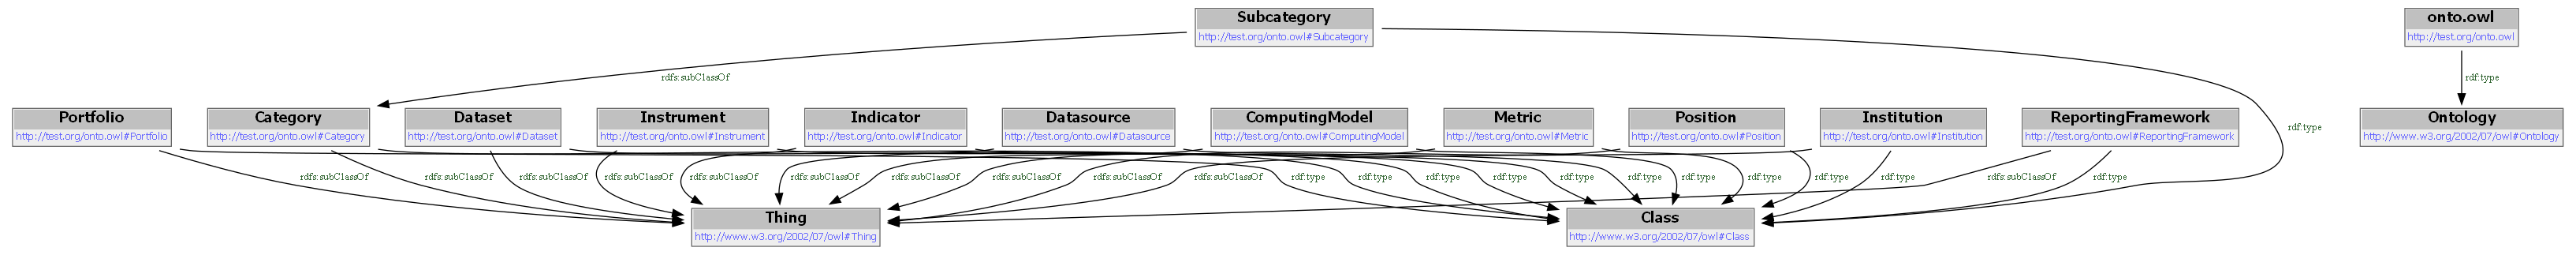

In [8]:
# Define the path to your xml file
file_path = "./onto_repo/pre_"+onto_root+"_onto.owl"

# Create a Graph object
g_pre = Graph()

result_pre = g_pre.parse(file_path, format="xml")

#saving as ttl test for use in Protege
g_pre.serialize(destination=file_path[:-3]+"ttl")

visualize(g_pre, "1")

----------------------------------------------
We also present an interactive visualization of the knowledge graph  
**Please click on the expand button on the bottom right to center the knowledge graph below**

In [9]:
print("Please click on the expand button on the bottom right to center the knowledge graph")
plot1 = visualize_networkx(onto)
# Generate and display the graph
plot1.show("./images/pre_"+onto_root+"_kg.html")
#Please click on the expand button on the bottom right to center the knowledge graph
#

Please click on the expand button on the bottom right to center the knowledge graph
./images/pre_SCR_kg.html


**Please click on the expand button on the bottom right to center the knowledge graph**

### 3.2 Defining the relationships

This is the next big step and gives meaning to the ontology. How the different key concepts are related or how they interact, structure your whole ontology.
These are often defined as Properties. Each of these relations can be called a Property. A Property can also be a value for an instance of a class.

In [10]:
with onto:
    
    #properties
    class DividedInto(ReportingFramework>> Category): pass
    class DividedIntoSub(Category>> Subcategory): pass
        
    class ArticleText(DataProperty): 
        range =[str]        
    class Article(DataProperty): 
        range =[str]   
    class ReportingBody(DataProperty): 
        range =[str]
    class ReferenceDate(DataProperty): 
        range =[str]
    class FltValue(DataProperty, FunctionalProperty):
        range=[float]
    class ValueDim(DataProperty, FunctionalProperty):
        range=[str]
    
    class HasCategory(ComputingModel>> Category): pass
    class ObtainedFromModel(Metric>> ComputingModel): pass
    class ObtainedFromDataset(Metric>> Dataset): pass

    class DependentVariableMetric(ComputingModel>>Metric): pass
    class DependentVariableIndicator(ComputingModel>>Indicator): pass
    class DependentVariableIndicatorM(Metric>>Indicator): pass

    class UsesDataset(Indicator >> Dataset): pass

    class ComesFromDatasource(Dataset >> Datasource): pass

    class OwnsDataset(Institution>> Dataset): pass
    class DataProvider(Institution>> Datasource): pass
        
    class HasPortfolio(Institution >> Portfolio, FunctionalProperty): pass
    class HasPositions(Portfolio >> Position): pass
    class IsInstrument(Position >> Instrument, FunctionalProperty): pass


    class Property(Instrument): pass
    class Bonds(Instrument): pass    

#updating
sync_reasoner(onto) # the reasoner functions to reparent connections and check whether or not the ontology is consistent, identify subsumption relationships between classes, and much more.

* Owlready2 * Running HermiT...
    C:\Program Files\Java\jdk-11.0.16.1\bin\java.exe -Xmx2000M -cp C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit;C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit\HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:///C:/Users/Anwender/AppData/Local/Temp/tmpb4h1yt32
* Owlready2 * HermiT took 0.9323544502258301 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [11]:
onto.save(file="./onto_repo/"+onto_root+"_onto.owl", format="rdfxml")

#### 3.2.1 Update 


(process:12076): Pango-WARNING **: 14:17:35.416: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:12076): Pango-WARNING **: 14:17:35.421: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



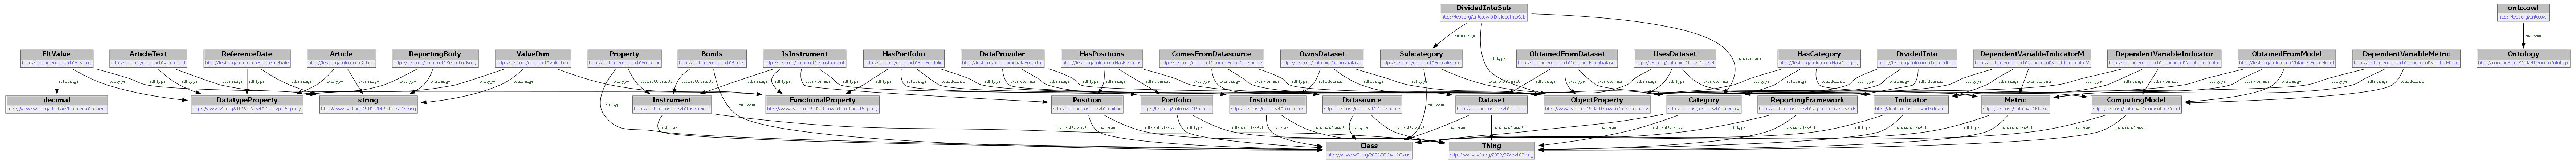

In [12]:
# Define the path to your xml file
file_path = "./onto_repo/"+onto_root+"_onto.owl"

# Create a Graph object
g_2 = Graph()

# Parse the TTL file using the graph object
result_2 = g_2.parse(file_path, format="xml")

visualize(g_2, "2")

In [13]:
plot2 = visualize_networkx(onto)
# Generate and display the graph
plot2.show("./images/"+onto_root+"_kg.html")

./images/SCR_kg.html


As you can see, the knowledge graph can get more complicated but the owlready2 package keeps all the information so that we don't have to. The arrows now detail how the different classes are related.

### 3.3 Instances

#### SCR  - Solvency Capital Requirement

Chapter V of the SCR details the standard formula used to calculate the total amount of funds that insurance and reinsurance companies in the European Union are required to hold. This takes into account various risk factors.
We focus on an example for Market Risk which is concerned about multiple sub-modules. It is defined as the square-root of the product between different sub-modules denoted by $i$ and $j$,  e.g., Property Risk, Equity Risk and a correlation parameter $C_{ij}$

$$
SCR_{market\,risk} = \sqrt{C_{ij}\cdot SCR_i \cdot SCR_j}
$$


We provide a specific basic example of using our ontology that we defined above to calculate Property Risk.
Property Risk is defined as from Title 1: Chapter V: Section 5: Subsection 4: Article 174: "shall be equal to the loss in the basic own funds that would result from an instantaneous decrease of 25 % in the value of immovable property. "

We start by defining an instance of the reporting framework and what it is related to.
We then define an instance of an institution that wants to submit a report following this reporting framework.
We give it a very basic portfolio for illustration.

In [14]:
with onto:
    SCR = ReportingFramework("SCR")
    SCR.label = "SCR"
    EIOPA = "European Insurance and Occupational Pensions Authority"

    SCR.ReportingBody = [EIOPA]
 
    SCR.ReferenceDate = ["1 July 2016"]


    risk_module = Category("Risk_Modules")
    non_life_underwriting = Subcategory("non_life_underwriting")
    life_underwriting = Subcategory("life_underwriting")
    health_underwriting= Subcategory("health_underwriting")
    market= Subcategory("market")
    counter_party_default= Subcategory("counter_party_default")
    operational= Subcategory("operational")

    SCR.DividedInto = [risk_module]

    risk_module.DividedInto = [non_life_underwriting, life_underwriting, health_underwriting, market, counter_party_default, operational ]



    #instance of institution
    my_fav_company =  Institution("best_insurance_firm") # a given firm, company, institution
    my_fav_company.label=["best insurance firm"]

    my_portfolio = Portfolio("best_portfolio")

    
    pos1 = Position("position_1")
    pos1.label=["pos1"]
    pos2 = Position("position_2")
    pos2.label=["pos2"]
    pos3 = Position("position_3")
    pos3.label=["pos3"]
    pos4 = Position("position_4")
    pos4.label=["pos4"]


    propertyA=Property("propertyA")
    propertyA.FltValue=1e7
    propertyA.ValueDim= 'euro'

    propertyB=Property("propertyB")
    propertyB.FltValue=1e6
    propertyB.ValueDim= 'euro'

    propertyC=Property("propertyC")
    propertyC.FltValue=1e5
    propertyC.ValueDim= 'euro'

    propertyD=Property("propertyD")
    propertyD.FltValue=1e4
    propertyD.ValueDim= 'euro'


    my_fav_company.HasPortfolio = my_portfolio
    my_portfolio.HasPositions = [pos1,pos2,pos3,pos4]
    pos1.IsInstrument = propertyA
    pos2.IsInstrument = propertyB
    pos3.IsInstrument = propertyC
    pos4.IsInstrument = propertyD

    # information is stored here in principle
    ba = Dataset("book_assets.csv")
    ds = Datasource("Internal_Department")

    ba.ComesFromDatasource = [ds]
    
    my_fav_company.OwnsDataset = [ba]
    my_fav_company.DataProvider= [ds]

### 3.4 Metrics

Here we define the various metrics, and in particular, Property Risk, which is used in determining Market Risk.
We show also how an instance can keep pertinent information linked to it, e.g., the specific article number reference in the SCR.


In [15]:
with onto:

    
    market_risk_module = ComputingModel("Market_Risk_Module")
    market_risk_module.label = ["mrm"]
    market_risk_module.HasCategory = [market]
    
    interest_rate_risk = Metric("Interest_Rate_Risk_sub_module")
    interest_rate_risk.Article = ["165","166","167"]
    
    equity_risk = Metric("Equity_Risk_sub_module")
    equity_risk.Article = ["168", "169", "170", "171", "172", "173" ]
    
    property_risk = Metric("Property_Risk_sub_module")
    property_risk.Article = ["174"]

    spread_risk = Metric("Spread_Risk_sub_module")
    spread_risk.Article = ["175", "176","177","178","179","180","181"]
    
    
    
    immovable_property = Indicator("immovable_property")
    own_funds = Indicator("own_funds")

    

    
    immovable_property.UsesDataset = [ba]    
    own_funds.UsesDataset = [ba]
    
    property_risk.ObtainedFromDataset = [ba]

    market_risk_module.DependentVariableMetric=[interest_rate_risk, equity_risk, property_risk, spread_risk]
    property_risk.DependentVariableIndicatorM = [immovable_property, own_funds]
    property_risk.ObtainedFromModel = [market_risk_module]
    
    own_funds.ValueDim = 'euro'
    immovable_property.ValueDim = 'euro'
    property_risk.ValueDim = "euro"

    own_funds.FltValue = 10e11

    immovable_property.FltValue = sum(my_portfolio.get_position_values())
    
    property_risk.FltValue = 0.25*immovable_property.FltValue

    

#### 3.4.1 Update again

* Owlready2 * Running HermiT...
    C:\Program Files\Java\jdk-11.0.16.1\bin\java.exe -Xmx2000M -cp C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit;C:\Users\Anwender\anaconda3\envs\test_rivacon_ml\Lib\site-packages\owlready2\hermit\HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:///C:/Users/Anwender/AppData/Local/Temp/tmp76miazhv
* Owlready2 * HermiT took 0.9342529773712158 seconds
* Owlready * Reparenting onto.Risk_Modules: {onto.Category} => {onto.ReportingFramework, onto.Category}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)



(process:11476): Pango-WARNING **: 14:17:41.296: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(process:11476): Pango-WARNING **: 14:17:41.304: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(process:11476): Pango-WARNING **: 14:17:41.310: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



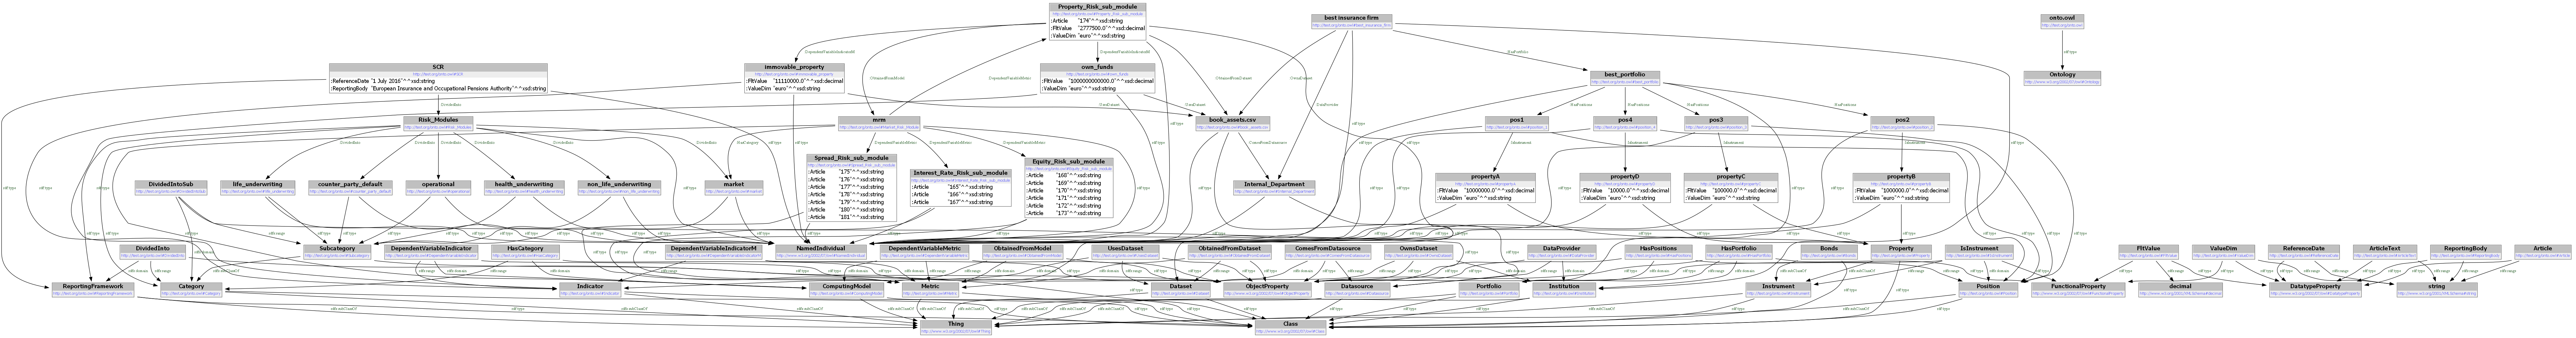

In [16]:
sync_reasoner(onto)
onto.save(file="./onto_repo/instances_"+onto_root+"_onto.owl", format="rdfxml")

# Define the path to your xml file
file_path = "./onto_repo/instances_"+onto_root+"_onto.owl"

# Create a Graph object
g_3 = Graph()

#saving as ttl test
g_3.serialize(destination=file_path[:-3]+"ttl")


result_3 = g_3.parse(file_path, format="xml")

visualize(g_3, "3")

In [17]:
plot3 = visualize_networkx(onto)
# Generate and display the graph
plot3.show("./images/"+onto_root+"_kg.html")

./images/SCR_kg.html


### 3.5 SPARQL Query Example

SPARQL (pronounced "sparkle") is a powerful query language and protocol used to retrieve and manipulate data stored in Resource Description Framework (RDF) format. In particular it is adept at extracting information from graph-based data, like a knowledge graph. 

Here we show some examples of how one can retrieve semantic information from the instance of our ontology.

Query 1: Find all Metrics which are obtained from a computing model

In [18]:
sparqlQuery = """  SELECT ?x ?y { ?x a onto:Metric .
                               ?x onto:ObtainedFromModel ?y 
                               } """

list(default_world.sparql(sparqlQuery))



[[onto.Property_Risk_sub_module, onto.Market_Risk_Module]]

In [19]:
sparqlQuery = """  SELECT ?x { ?x a onto:Metric .
                               } """

list(default_world.sparql(sparqlQuery))

[[onto.Interest_Rate_Risk_sub_module],
 [onto.Equity_Risk_sub_module],
 [onto.Property_Risk_sub_module],
 [onto.Spread_Risk_sub_module]]

Query 2a: Which metrics are used to calculate market risk? 

In [20]:
sparqlQuery = """  SELECT ?x ?y { ?x a onto:ComputingModel .
                                  ?x onto:DependentVariableMetric ?y 
                               } """


list(default_world.sparql(sparqlQuery))

[[onto.Market_Risk_Module, onto.Interest_Rate_Risk_sub_module],
 [onto.Market_Risk_Module, onto.Property_Risk_sub_module],
 [onto.Market_Risk_Module, onto.Equity_Risk_sub_module],
 [onto.Market_Risk_Module, onto.Spread_Risk_sub_module]]

Query 2b: Which variables are used to calculate various metrics?

In [21]:
sparqlQuery = """  SELECT ?x ?y { ?x a onto:Metric .
                                  ?x onto:DependentVariableIndicatorM ?y 
                               } """


list(default_world.sparql(sparqlQuery))

[[onto.Property_Risk_sub_module, onto.own_funds],
 [onto.Property_Risk_sub_module, onto.immovable_property]]

Query 3: Which regulatory authority supervises the corresponding reporting framework? 

In [22]:
sparqlQuery = """  SELECT ?x ?y { ?x a onto:ReportingFramework . 
                               ?x onto:ReportingBody ?y
                               } """


list(default_world.sparql(sparqlQuery))

[[onto.SCR, 'European Insurance and Occupational Pensions Authority']]

Query 4: Where can one obtain the data to calculate Property risk?

In [23]:
sparqlQuery = """  SELECT ?x ?y { ?x a onto:Metric . 
                               ?x onto:ObtainedFromDataset ?y 
                               } """

list(default_world.sparql(sparqlQuery))


[[onto.Property_Risk_sub_module, onto.book_assets.csv]]

Query 5: Who controls this dataset?

In [24]:
sparqlQuery = """  SELECT ?x ?y ?z { ?x a onto:Metric . 
                               ?x onto:ObtainedFromDataset ?y .
                               ?y onto:ComesFromDatasource ?z } """

list(default_world.sparql(sparqlQuery))

[[onto.Property_Risk_sub_module,
  onto.book_assets.csv,
  onto.Internal_Department]]

Query 6: Which institutions are available?

In [25]:
sparqlQuery = """  SELECT ?x { ?x a onto:Institution . 
                                
                               } """

list(default_world.sparql(sparqlQuery))

[[onto.best_insurance_firm]]

Query 7: How many positions does it have?

In [26]:
sparqlQuery = """  SELECT ?x ?y ?z { ?x a onto:Institution . 
                                ?x onto:HasPortfolio ?y .
                                ?y onto:HasPositions ?z
                               } """

list(default_world.sparql(sparqlQuery))

[[onto.best_insurance_firm, onto.best_portfolio, onto.position_4],
 [onto.best_insurance_firm, onto.best_portfolio, onto.position_2],
 [onto.best_insurance_firm, onto.best_portfolio, onto.position_3],
 [onto.best_insurance_firm, onto.best_portfolio, onto.position_1]]

Query 8: What are the values of these positions?

In [27]:
sparqlQuery = """  SELECT ?x ?y ?z ?xx ?xy { ?x a onto:Institution . 
                                ?x onto:HasPortfolio ?y .
                                ?y onto:HasPositions ?z .
                                ?z onto:IsInstrument ?xx .
                                ?xx onto:FltValue ?xy
                               } """

list(default_world.sparql(sparqlQuery))

[[onto.best_insurance_firm,
  onto.best_portfolio,
  onto.position_4,
  onto.propertyD,
  10000.0],
 [onto.best_insurance_firm,
  onto.best_portfolio,
  onto.position_2,
  onto.propertyB,
  1000000.0],
 [onto.best_insurance_firm,
  onto.best_portfolio,
  onto.position_3,
  onto.propertyC,
  100000.0],
 [onto.best_insurance_firm,
  onto.best_portfolio,
  onto.position_1,
  onto.propertyA,
  10000000.0]]

Query 9: What are the values of all available metrics?

In [28]:


sparqlQuery = """  SELECT ?x ?y { ?x a onto:Metric .
                                ?x onto:FltValue ?y
                               } """

list(default_world.sparql(sparqlQuery))

[[onto.Property_Risk_sub_module, 2777500.0]]

### 3.6 Close the ontoloogy

It is customary to close the owlready2 ontology object to prevent further edits.

In [29]:
close_world(onto)

## 4 Outlook

Here we have given just a taste of how to develop and ontology and the benefits it can bring. If we can leverage its usefulness in combination with other tools, we will have a robust and powerful asset, able to intuit understanding from vast databases. This is especially true when dealing with large language models where an ontology can assist in queries through techniques such as Retrieval Augmented Generation (RAG) by providing a framework for LLMs to better grasp the semantic meaning of queries in the database.

## 5 Sources

[[1] Ontology Wiki](https://en.wikipedia.org/wiki/Ontology_(information_science))\
[[2] Ontology vs. KG](https://enterprise-knowledge.com/whats-the-difference-between-an-ontology-and-a-knowledge-graph/)\
[[3] ESG Ontology](https://www.mdpi.com/2079-9292/13/9/1719)\
[[4] SCR](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32015R0035)\
[[5] Owlready2](https://owlready2.readthedocs.io/en/latest/)
